In [1]:
# dependencies

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# setting color palette

colors = [
    (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
    (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
    (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
    (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
]

sns.set(color_codes=True)
sns.set_palette(colors)

<br>
<br>
<br>

### Data Collection

In [3]:
# loading csv file
data = pd.read_csv("../data/data.csv")
data.head()

,promotion,sales,market_id,week,market_size,location_id,age_of_store
0,3,33.73,1,1,Medium,1,4
1,3,35.67,1,2,Medium,1,4
2,3,29.03,1,3,Medium,1,4
3,3,39.25,1,4,Medium,1,4
4,2,27.81,1,1,Medium,2,5


In [4]:
# checking shape
data.shape

(548, 7)

In [5]:
# checking duplicates
data.duplicated().value_counts()

False    548
dtype: int64

<br>
<br>
<br>

### Analysis

#### Promotion

3 different types of promotions to test

In [6]:
# value counts
promotion_counts = data.promotion.value_counts()
promotion_counts

3    188
2    188
1    172
Name: promotion, dtype: int64

There are 188 samples of promotion_2 & promotion_3<br>
and 172 samples of promotion_1

<br>

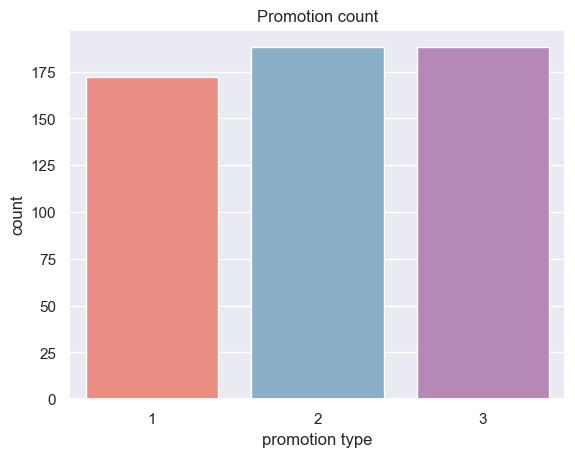

In [28]:
# bar plot

sns.barplot(x=promotion_counts.index, y=promotion_counts.values)
plt.title("Promotion count")
plt.ylabel("count")
plt.xlabel("promotion type")
plt.show()

<br>

### Sales

Sales made using the given promotion<br>
In thousands of dollars

In [8]:
# descriptive stats
data.sales.describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: sales, dtype: float64

note:
- the maximum sale is of 99,650 dollars
- the minimum sale is of 17,340 dollars

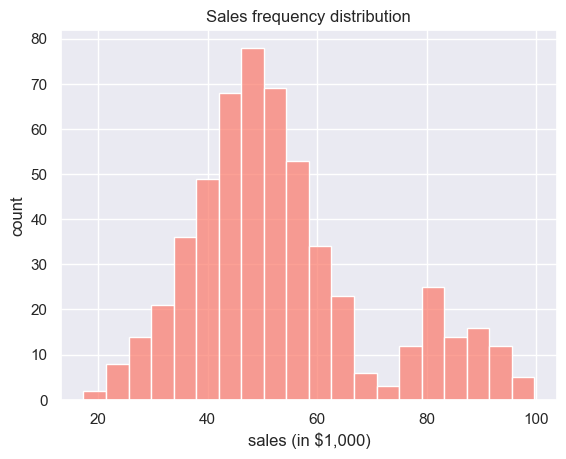

In [29]:
# sales histogram

sns.histplot(x=data.sales, bins=20)
plt.title("Sales frequency distribution")
plt.ylabel("count")
plt.xlabel("sales (in $1,000)")
plt.show()

note:
- the sales data is right skewed and bimodal in nature

<br>

Now, let's check sales made using each promotion

In [10]:
# total sales for each promotion
sales_per_promotion = data.groupby(['promotion']).sales.sum().sort_values(ascending=False)
sales_per_promotion

promotion
3    10408.52
1     9993.03
2     8897.93
Name: sales, dtype: float64

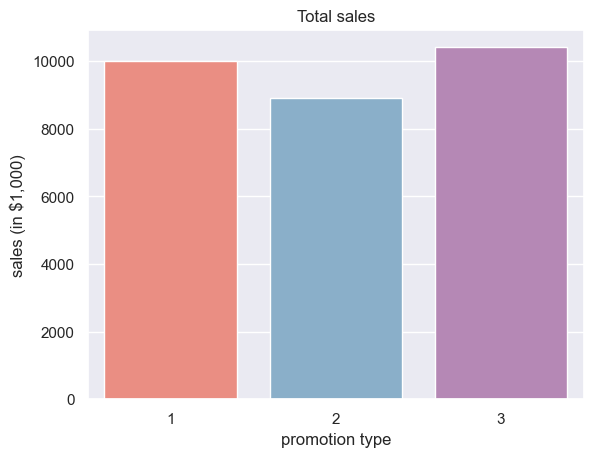

In [30]:
# bar plot

sns.barplot(x=sales_per_promotion.index, y=sales_per_promotion.values)
plt.title("Total sales")
plt.ylabel("sales (in $1,000)")
plt.xlabel("promotion type")
plt.show()

note:
- promotion_3 achieved the highest sale of 10,408,520 dollars overall
- promotion_2 achieved the lowest sale of 9,993,030 dollars overall
- promotion_1 performed better than promotion_2, despite of having less promotion_count

<br>
<br>

Total sales give a rough idea about how each promotion performed, but not all promotions have same counts.<br>
Let's look at a better metric to see which promotion performed best.

<br>

Calculating: total_sales per unit promotion 

In [12]:
# total sales per unit promotion

count = data.promotion.value_counts().sort_index()
total_sales = data.groupby(['promotion']).sales.sum().sort_index()

total_sales_per_unit =  total_sales / count
total_sales_per_unit

promotion
1    58.099012
2    47.329415
3    55.364468
dtype: float64

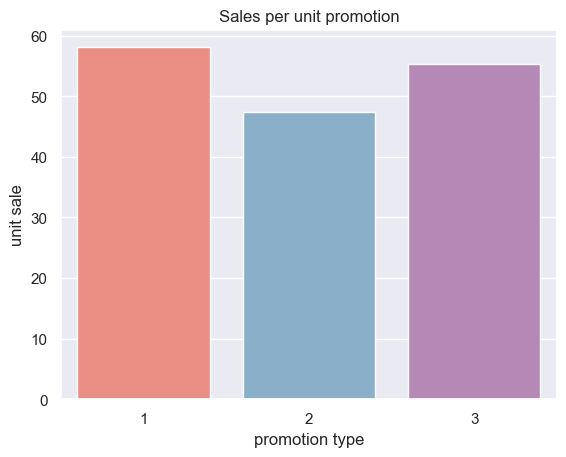

In [32]:
# bar plot

sns.barplot(x=total_sales_per_unit.index, y=total_sales_per_unit.values)
plt.title("Sales per unit promotion")
plt.ylabel("unit sale")
plt.xlabel("promotion type")
plt.show()

note:
- promotion_1 tend to achieve better sale followed by promotion_3 and promotion_2

<br>

Note that these results are of the overall experiment.<br>
But the promotion might perform differently in different markets.<br>
Let's have a look at individual markets.

<br>

#### Market

Id of the market in which a particular promotion was applied

In [14]:
# no of unique values
data.market_id.nunique()

10

There are total 10 unique markets

In [15]:
# value counts
market_counts = data.market_id.value_counts()
market_counts

3     88
10    80
5     60
6     60
7     60
1     52
8     48
9     40
4     36
2     24
Name: market_id, dtype: int64

note:
- market_3 has most number of promotions: 88
- market_2 has least number of promotions: 24

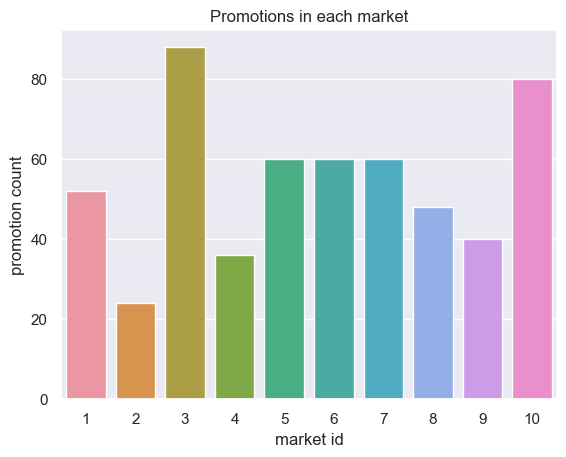

In [33]:
# bar plot

sns.barplot(x=market_counts.index, y=market_counts.values)
plt.title("Promotions in each market")
plt.ylabel("promotion count")
plt.xlabel("market id")
plt.show()

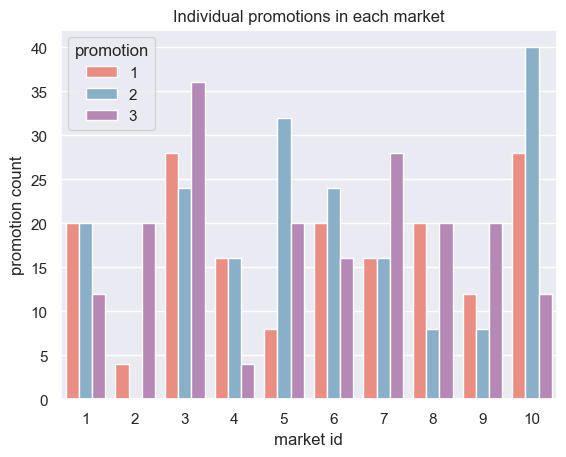

In [34]:
# count plot

sns.countplot(x=data.market_id, hue=data.promotion)
plt.title("Individual promotions in each market")
plt.ylabel("promotion count")
plt.xlabel("market id")
plt.show()

note:
- market 2 has only protion_1 & promotion_3. Majorly promotion_3
- market 5 & 10 has majority of promotion_2
- generally, a particular market has any 2 promotions in similar proportion & the 3rd promotion lower than the 2

<br>

Let's look at sales contribution by each market

In [18]:
# sales made in each market
market_sales = data.groupby(['market_id']).sales.sum()
market_sales

market_id
1     1825.29
2     1482.27
3     7477.51
4     1962.29
5     2930.28
6     2183.85
7     2668.52
8     2349.74
9     2117.63
10    4302.10
Name: sales, dtype: float64

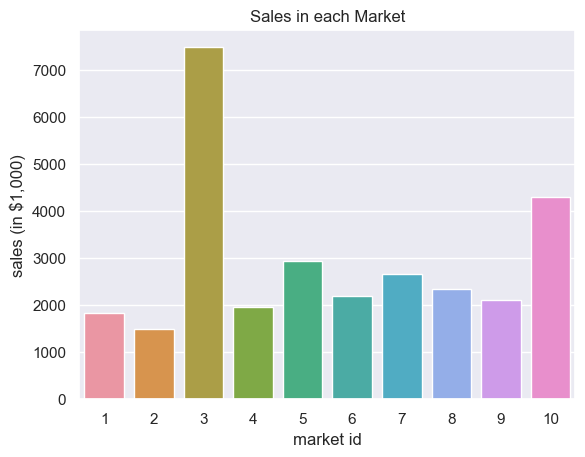

In [35]:
# bar plot

sns.barplot(x=market_sales.index, y=market_sales.values)
plt.title("Sales in each Market")
plt.ylabel("sales (in $1,000)")
plt.xlabel("market id")
plt.show()

Market_3 recorded the most sales, but again market_3 had most number of promotions.<br>
Let's look at a more representative metric.

<br>

Sales per promotion in each market

In [20]:
# sales per market_count

market_count = data.market_id.value_counts().sort_index()
total_sales = data.groupby(['market_id']).sales.sum().sort_index()

sales_pre_market_count = total_sales / market_count
sales_pre_market_count

market_id
1     35.101731
2     61.761250
3     84.971705
4     54.508056
5     48.838000
6     36.397500
7     44.475333
8     48.952917
9     52.940750
10    53.776250
dtype: float64

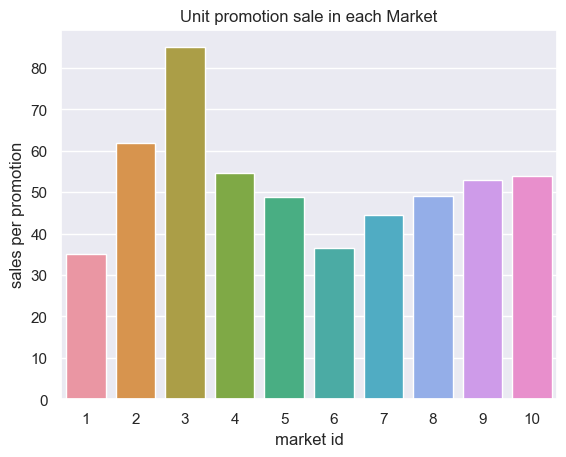

In [36]:
# barplot

sns.barplot(x=sales_pre_market_count.index, y=sales_pre_market_count.values)
plt.title("Unit promotion sale in each Market")
plt.ylabel("sales per promotion")
plt.xlabel("market id")
plt.show()

Note:
- Market_3 again has highest unit sales of 84,971 dollars
- But contrast to previous plot, market_2 has second highest unit sales of 61,761 dollars

<br>
<br>
<br>

Let's have a closer look at market 3

In [22]:
# seperating market_3
market_3 = data[data.market_id == 3][['promotion', 'sales', 'week']]
market_3.head()

,promotion,sales,week
76,3,86.14,1
77,3,82.56,2
78,3,79.36,3
79,3,77.17,4
80,1,88.73,1


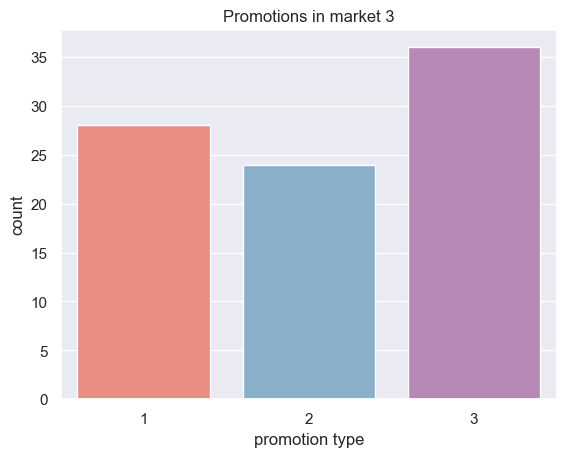

In [37]:
 # bar plot

sns.barplot(x=market_3.promotion.value_counts().index, y=market_3.promotion.value_counts().values)
plt.title("Promotions in market 3")
plt.ylabel("count")
plt.xlabel("promotion type")
plt.show()

Market 3 has more number of promotion_3, followed by promotion_1, followed by promotion_2

<br>

In [24]:
# sales per promotion

promotion_count = market_3.promotion.value_counts().sort_index()
total_sales = market_3.groupby(['promotion']).sales.sum().sort_index()

sales_pre_promotion_count = total_sales / promotion_count
sales_pre_promotion_count

promotion
1    89.647143
2    79.592083
3    84.921667
dtype: float64

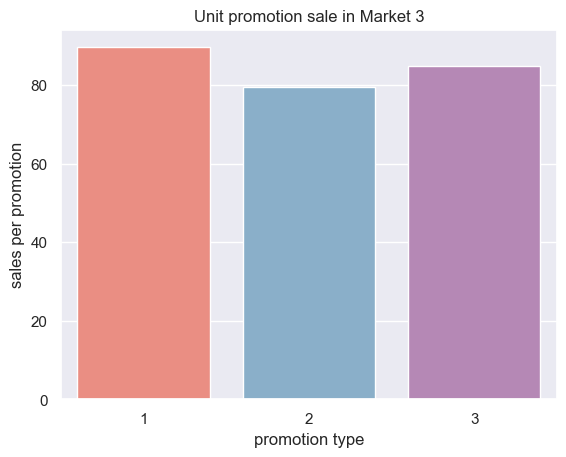

In [38]:
# bar plot

sns.barplot(x=sales_pre_promotion_count.index, y=sales_pre_promotion_count.values)
plt.title("Unit promotion sale in Market 3")
plt.ylabel("sales per promotion")
plt.xlabel("promotion type")
plt.show()

Promotion 1 tend to perform better in market_3<br>
Promotion 2 has the worst performance in market_3<br>

<br>

Let's look at weekly performance in market 3

In [26]:
# total sales per week

week_count = market_3.week.value_counts().sort_index()
total_sales = market_3.groupby(['week']).sales.sum().sort_index()

sales_per_week = total_sales / week_count
sales_per_week

week
1    86.973182
2    83.092273
3    85.340000
4    84.481364
dtype: float64

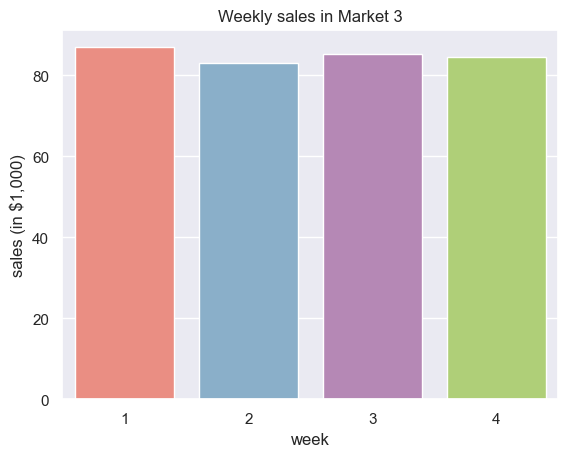

In [39]:
# barplot

sns.barplot(x=sales_per_week.index, y=sales_per_week.values)
plt.title("Weekly sales in Market 3")
plt.ylabel("sales (in $1,000)")
plt.xlabel("week")
plt.show()

Sales are pretty balanced per week

<br>
<br>
<br>

### Conclusion

Overall, promotion of type 1 tends to perform better than other 2 types.<br>
Market with ID 3 have the best sales record, followed by 2 and 4.<br>
Specifically in market 3, promotion of type 1 performs slightly better than that of type 3.<br>
Week does not have much contribution. The total sales are more or less same across all the weeks. Atleast for market 3.

Short answer: Promotion of type 1